# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

<IPython.core.display.Javascript object>


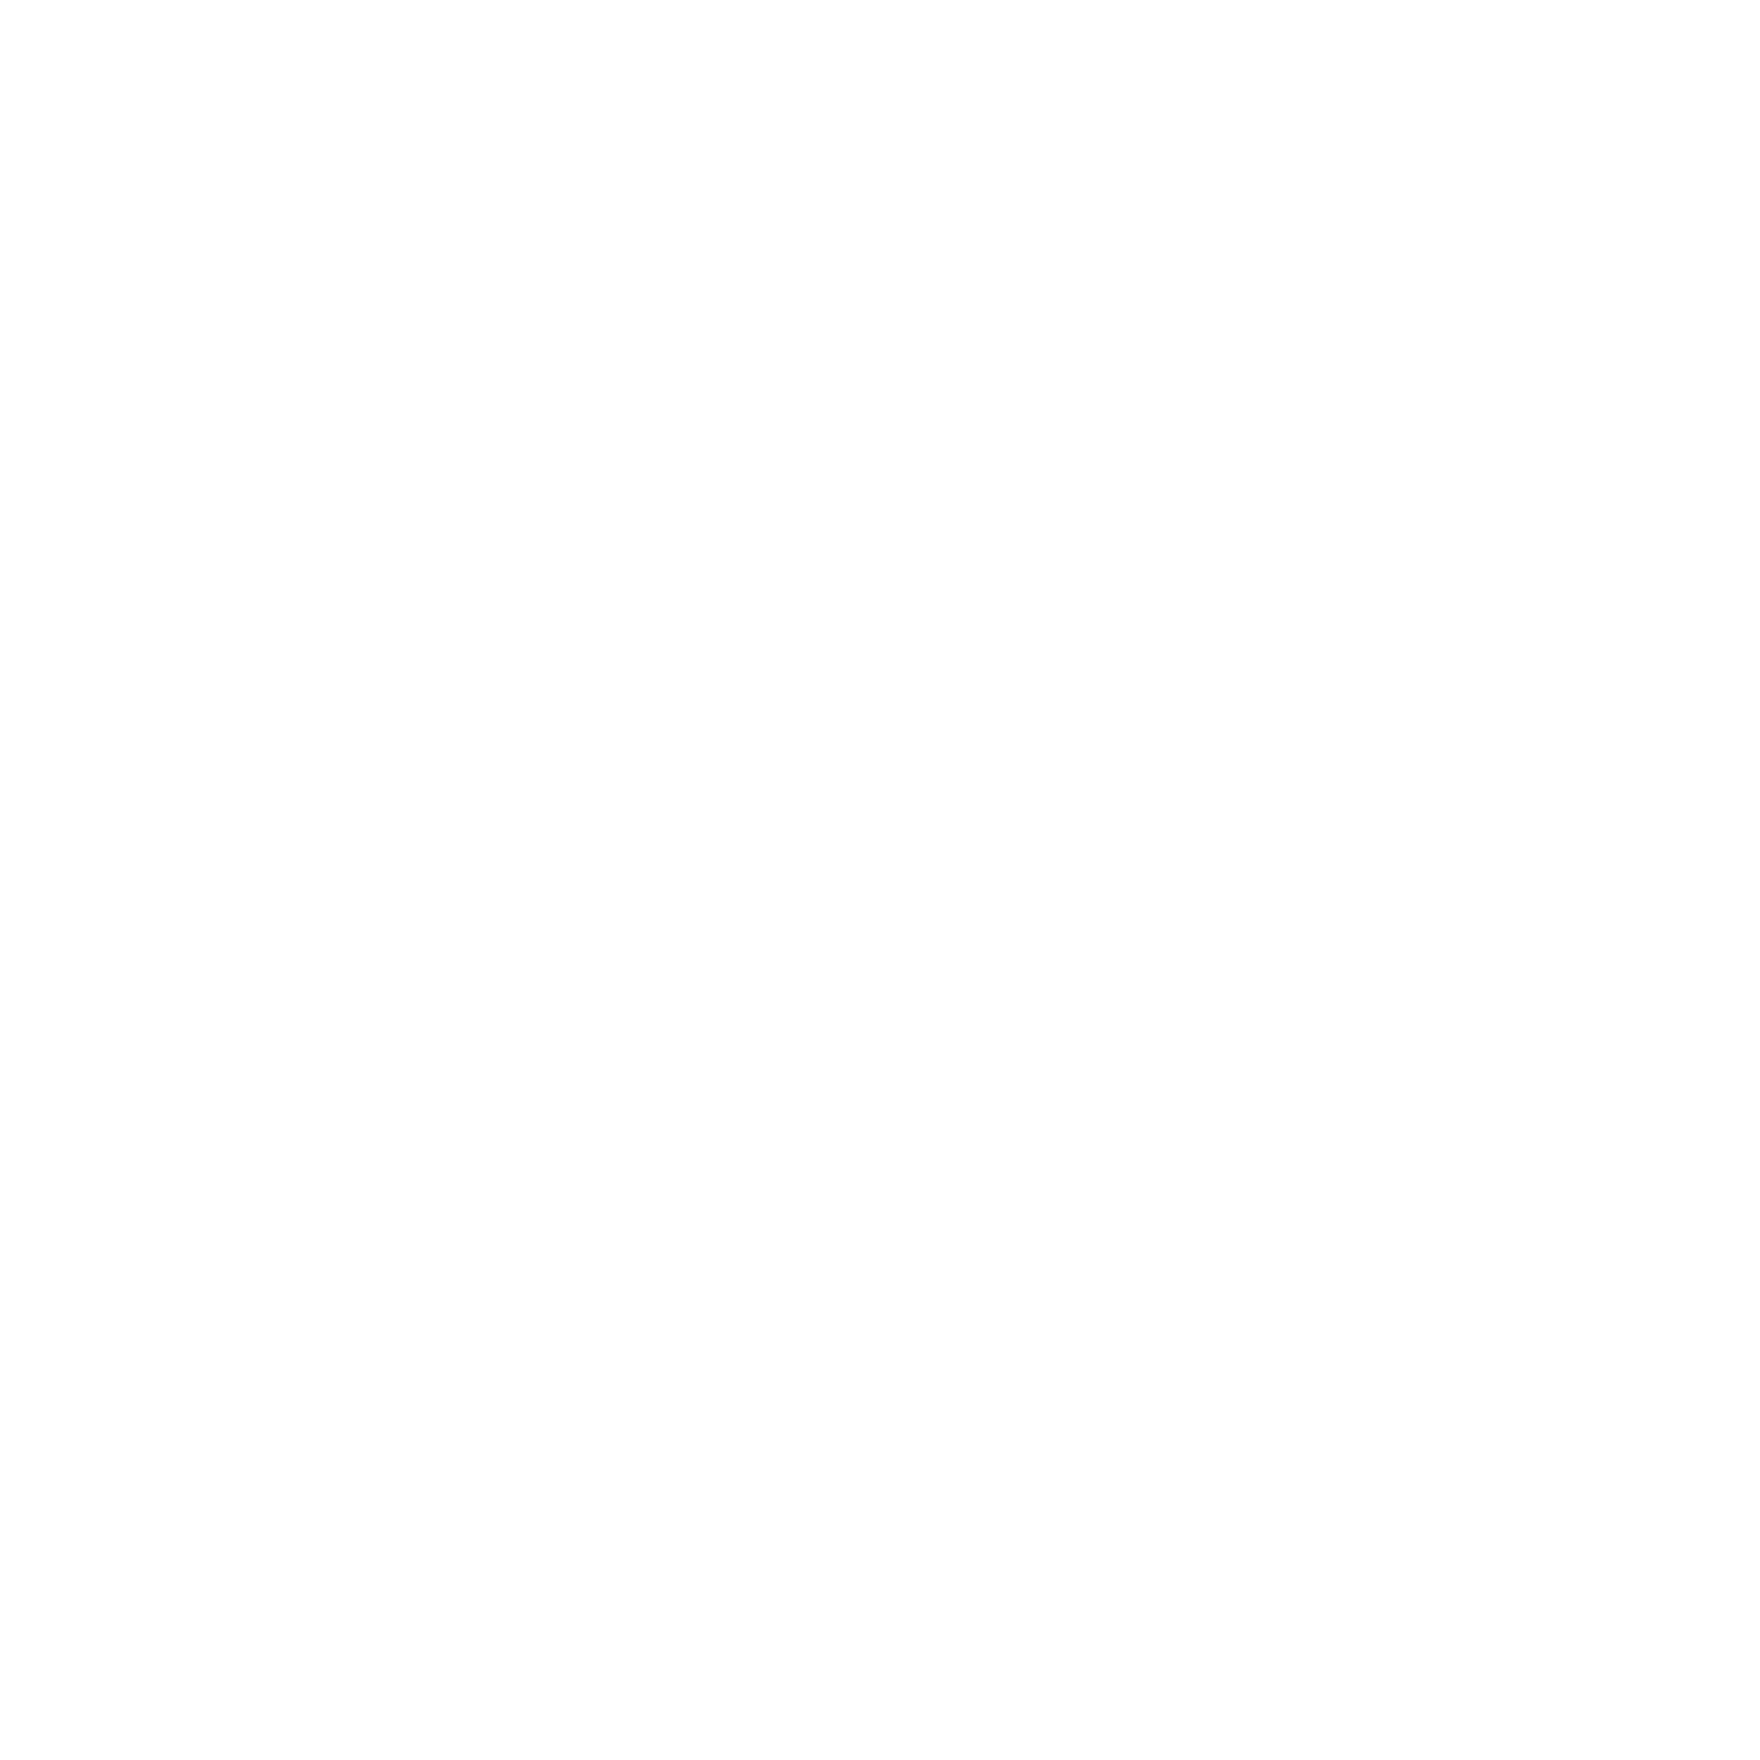

In [377]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
import numpy as np

plt.switch_backend('nbagg')

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [378]:
# Read data
df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

# Convert 'Date' column to type Datetime
df['Date'] = pd.to_datetime(df['Date'])

# Exclude data for 29th Feb
feb_data = (df['Date'].dt.month == 2) & (df['Date'].dt.day == 29)
df = df[~feb_data]

# Split data into 2005-2014 and 2015
df_2005_2014 = df[df['Date'].dt.year < 2015]
df_2015 = df[df['Date'].dt.year == 2015]

In [379]:
# Get record high and record low
def get_records_high_low(df, func):
    """"
    Takes data frame, groups by month and day and
    returns array with max or min applied.
    
    Params:
        df (Dataframe) - Dataframe to group
        func (str) - Aggregate function to apply
            Options: 'min' and 'max'
    """
    df['Month'] = df['Date'].dt.month
    df['Day'] = df['Date'].dt.day
    
    if func == 'max':
        df = df[df['Element'] == 'TMAX']
        result = df.groupby(['Month', 'Day'])['Data_Value'].max()
    elif func == 'min':
        df[df['Element'] == 'TMIN']
        result = df.groupby(['Month', 'Day'])['Data_Value'].min()

    result = np.array(result)/10
    return result

In [380]:
# Get min and max temperature in arrays
# 2005-2014
min_array = get_records_high_low(df_min, 'min')
max_array = get_records_high_low(df_max, 'max')

# 2015
min_2015_array = get_records_high_low(df_2015, 'min')
max_2015_array = get_records_high_low(df_2015, 'max')

# Get teperatures (for scatter plot) from 2015 which broke the previous records
min_bool_mask = min_2015_array < min_array
max_bool_mask = max_2015_array > max_array

max_temp_2015 = max_2015_array[max_bool_mask]
max_temp_2015_days = np.where(max_bool_mask)[0]

min_temp_2015 = min_2015_array[min_bool_mask]
min_temp_2015_days = np.where(min_bool_mask)[0]

temp_2015 = np.concatenate([max_temp_2015, min_temp_2015])
days_2015 = np.concatenate([max_temp_2015_days, min_temp_2015_days])

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


array([ 39, 106, 126, 127, 130, 137, 207, 209, 230, 249, 250, 258, 259,
       260, 270, 271, 292, 305, 306, 307, 308, 309, 321, 340, 341, 342,
       343, 344, 345, 346, 347, 348, 349, 356, 357, 358, 359,   4,  10,
        33,  44,  45,  46,  47,  49,  50,  51,  53,  54,  55,  56,  57,
        58,  63,  64,  65,  86,  87,  88, 113, 114, 139, 183, 239, 289,
       290, 291, 292, 313])

<IPython.core.display.Javascript object>


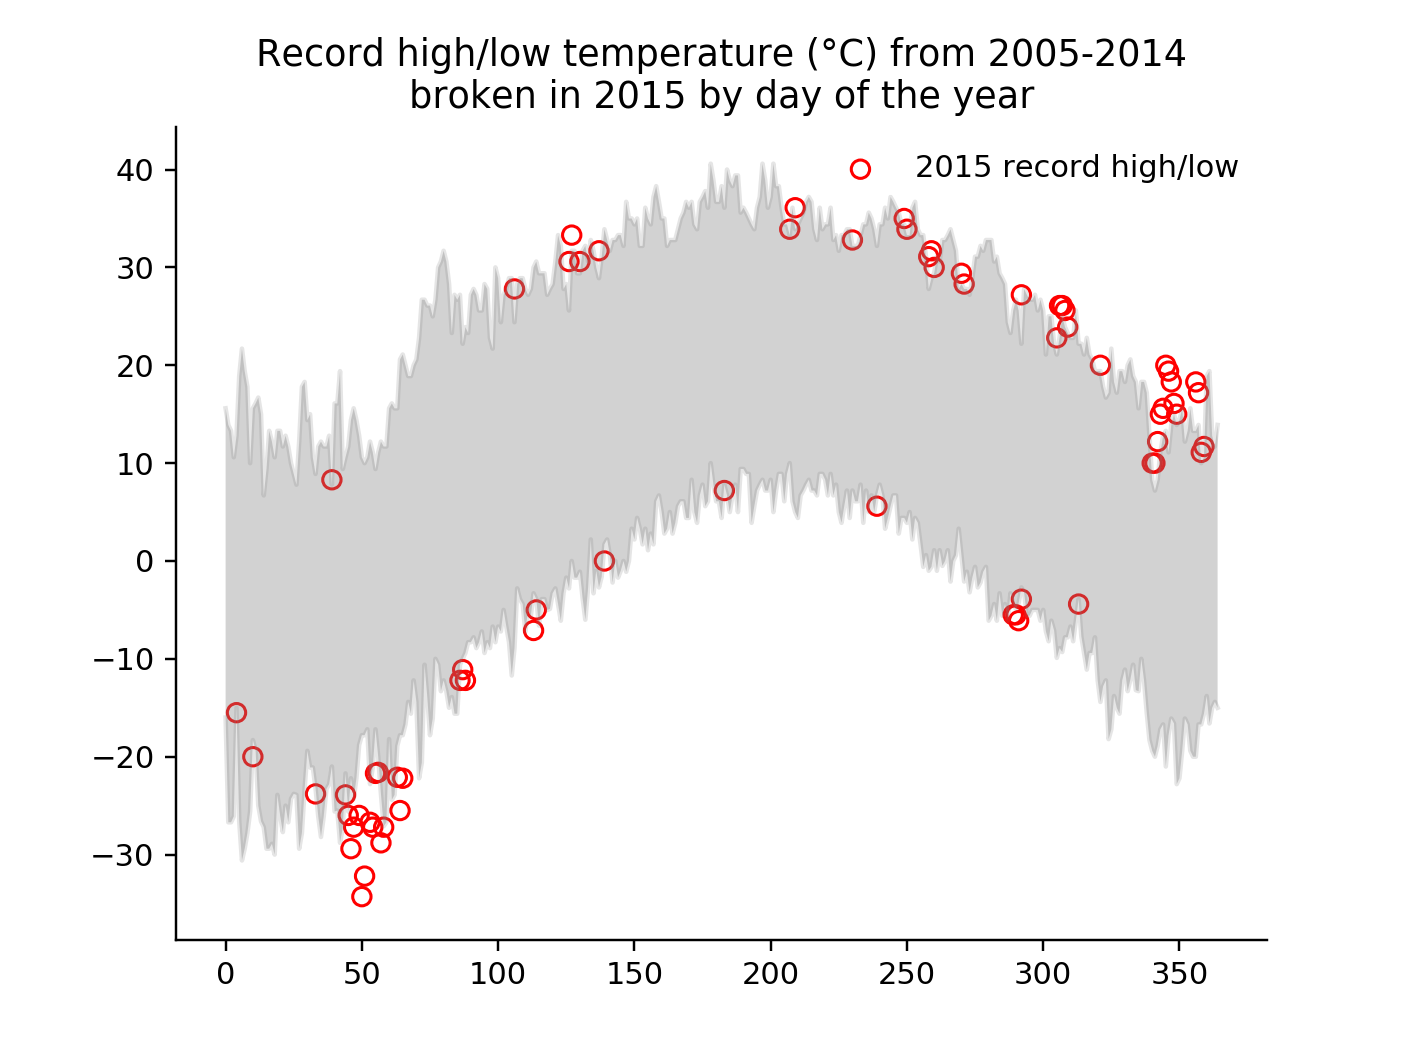

In [381]:
# Plot the min and max on same graph
plt.figure()

plt.plot(min_array, color='grey', alpha=0.2, label='_nolegend_')
plt.plot(max_array, color='grey', alpha=0.2, label='_nolegend_')
plt.scatter(days_2015, temp_2015, facecolors='none', edgecolors='red')

# Add title and legend
plt.title("""
Record high/low temperature (°C) from 2005-2014
broken in 2015 by day of the year""")

plt.legend(['2015 record high/low'], edgecolor='none')

# Fill grey between the lines
plt.gca().fill_between(range(len(min_array)),
                       min_array, max_array,
                      facecolor='grey',
                      alpha=0.35)

# remove the top and right lines of frame of the chart
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()